# GenDes Subscription Renewal Prediction Project

## Life Cycle of a Machine Learning Project
* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

## About GenDes

GenDes is a fictional company created for this project, positioned at the forefront of leveraging generative AI to revolutionize 3D home design. By offering cutting-edge tools and resources, GenDes enables both professionals and hobbyists to bring their visions to life with unprecedented ease and flexibility. This hypothetical scenario serves as a case study to model real-world business challenges and data analytics scenarios in the subscription-based service domain.

### 1) Problem statement

With the growth in GenDes's user base, manually predicting subscription renewals has become increasingly challenging. The objective is to develop a machine learning model to accurately predict whether a customer will renew their subscription. This model will assist GenDes in identifying users at risk of not renewing and developing targeted strategies to improve renewal rates.

The goal is to build a Classification model that predicts subscription renewal outcomes (renewed or not renewed) based on various user engagement metrics and demographic data. By accurately predicting renewals, GenDes can more effectively allocate resources and tailor engagement strategies to enhance customer retention.

Implementing this model can significantly optimize GenDes's customer engagement and retention strategies, ensuring sustained growth and customer satisfaction by proactively addressing the needs and preferences of its diverse user base.

### 2) Data collection

The dataset is a synthetic representation of GenDes's user interaction and subscription data, crafted to model real-world scenarios of customer engagements and renewal outcomes. It's important to note that GenDes, along with the dataset, is fictional and created solely for this project.


This table provides a structured overview of each column in the dataset: 


| Column Name                   | Description                                                          |
|-------------------------------|----------------------------------------------------------------------|
| `CustomerID`                  | Unique identifier for each customer.                                 |
| `Country`                     | The country where the customer resides.                              |
| `user_education`              | The highest level of education achieved by the customer.             |
| `Gender`                      | The gender of the customer.                                          |
| `UsesAdvancedFeatures`        | Indicates whether the customer uses advanced features (Y/N).         |
| `AppEngagementSeconds`        | Total number of seconds the customer has engaged with the app.       |
| `LastLoginDaysAgo`            | Number of days since the customer last logged into the app.          |
| `Profession`                  | The customer's profession.                                           |
| `SubscriptionType`            | Type of subscription the customer has chosen.                        |
| `UsesVR`                      | Indicates whether the customer uses VR features (Y/N).               |
| `RenewSubscription`           | Indicates whether the customer has renewed their subscription (Y/N). |
| `Age`                         | Age of the customer.                                                 |
| `DesignProjectScale`          | Scale of design projects the customer is involved in.                |
| `NumberOfDesigns`             | Number of designs the customer has created.                          |
| `TutorialProgressionType`     | Level of tutorial progression completed by the customer.             |
| `FrequencyOfDesignToolUsage`  | Frequency of design tool usage by the customer.                      |
| `CustomerSupportCall`         | Indicates if the customer has called support (Y/N).                  |



#### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Set display options
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows",1000)

**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv("dataset.csv")

**Show Top 5 Records**

In [4]:
df.head()

,CustomerID,Country,user_education,Gender,UsesAdvancedFeatures,AppEngagementSeconds,LastLoginDaysAgo,Profession,SubscriptionType,UsesVR,RenewSubscription,Age,DesignProjectScale,NumberOfDesigns,TutorialProgressionType,FrequencyOfDesignToolUsage,CustomerSupportCall
0,CUST00001,USA,High School,Male,N,14513,7,Hobbyist,Pay-as-you-go,Y,Yes,27.0,Small,19,Beginner,Weekly,N
1,CUST00002,USA,Master's,Female,N,2412,2,Architect,Basic,Y,Yes,27.0,Mixed-use,26,Not Attended,Monthly,N
2,CUST00003,USA,Bachelor's,Male,Y,44444,8,Hobbyist,Basic,Y,Yes,35.0,Medium,155,Advanced,Monthly,N
3,CUST00004,USA,Bachelor's,Male,N,98,103,Hobbyist,Basic,Y,Yes,48.0,Small,153,Intermediate,Monthly,N
4,CUST00005,Canada,Master's,Female,N,1082,5,Interior Designer,Basic,Y,No,29.0,Large,128,Beginner,Daily,Y


**Shape of the dataset**

In [5]:
df.shape

(25480, 17)

**Summary of the dataset**

In [6]:
# Display summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AppEngagementSeconds,25480.0,5667.043210,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
LastLoginDaysAgo,25480.0,25.714168,39.467454,0.0,4.0,9.0,24.0,200.0
Age,25480.0,32.776609,8.235692,18.0,26.0,32.0,38.0,63.0
NumberOfDesigns,25480.0,99.404474,53.602178,0.0,50.0,99.0,149.0,200.0


**Check Datatypes in the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  25480 non-null  object 
 1   Country                     25480 non-null  object 
 2   user_education              25480 non-null  object 
 3   Gender                      25480 non-null  object 
 4   UsesAdvancedFeatures        25480 non-null  object 
 5   AppEngagementSeconds        25480 non-null  int64  
 6   LastLoginDaysAgo            25480 non-null  int64  
 7   Profession                  25480 non-null  object 
 8   SubscriptionType            25480 non-null  object 
 9   UsesVR                      25480 non-null  object 
 10  RenewSubscription           25480 non-null  object 
 11  Age                         25480 non-null  float64
 12  DesignProjectScale          25480 non-null  object 
 13  NumberOfDesigns             254

### 3) Exploring Data

In [8]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# Print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['AppEngagementSeconds', 'LastLoginDaysAgo', 'Age', 'NumberOfDesigns']

We have 13 categorical features : ['CustomerID', 'Country', 'user_education', 'Gender', 'UsesAdvancedFeatures', 'Profession', 'SubscriptionType', 'UsesVR', 'RenewSubscription', 'DesignProjectScale', 'TutorialProgressionType', 'FrequencyOfDesignToolUsage', 'CustomerSupportCall']


In [9]:
# Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

CustomerID
CUST00001    0.003925
CUST16995    0.003925
CUST16993    0.003925
CUST16992    0.003925
CUST16991    0.003925
               ...   
CUST08492    0.003925
CUST08491    0.003925
CUST08490    0.003925
CUST08489    0.003925
CUST25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
Country
USA           66.173469
UK            14.646782
Turkey        12.919937
Azerbaijan     3.343799
Canada         2.162480
Other          0.753532
Name: proportion, dtype: float64
---------------------------
user_education
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
Gender
Female    58.092622
Male      41.907378
Name: proportion, dtype: float64
---------------------------
UsesAdvancedFeatures
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
Profession
Architect            28.237834
Interior Designer   

**Insights**

* **Geographic and Demographic Focus**:
  - The majority of users are from the **USA (66.17%)** and **UK (14.65%)**, with significant participation from **Turkey (12.92%)**. 
  - The dataset features a higher proportion of **female users (58.09%)** compared to male users, emphasizing the engagement from this demographic segment.

* **Professional and Educational Background**:
  - Users are primarily **Architects (28.24%)** and **Interior Designers (27.54%)**, with a notable presence of **Hobbyists (25.85%)** and **Students (16.90%)**, suggesting robust professional diversity.
  - A large segment of the user base holds **Bachelor's (40.16%)** or **Master's degrees (37.81%)**, indicating a highly educated user population.

* **Engagement and Subscription Preferences**:
  - A vast majority subscribes to the **Basic plan (90.12%)**, which along with high **VR usage (89.38%)** demonstrates significant tool engagement.
  - **Renewal rates (66.79%)** suggest strong ongoing user commitment and satisfaction with the platform.

* **Tutorial and Support Engagement**:
  - Users engage predominantly at the **Beginner (39.61%)** and **Intermediate (30.38%)** tutorial levels, reflecting a continuum of learning and skill development.
  - Nearly half of the users have **contacted customer support (49.67%)**, highlighting active interaction and possibly pointing to areas where user support could be enhanced.

* **Project Scale and Design Tool Usage**:
  - A significant number of projects are classified as **Large (39.61%)** or **Mixed-use (27.18%)**, indicating the platform's critical role in substantial design projects.
  - The **frequency of design tool usage** is high, with many users engaging on a **daily (39.61%)** or **weekly basis (30.52%)**, showcasing deep integration into users' daily workflows.


### Univariate Analysis

* Numerical Features

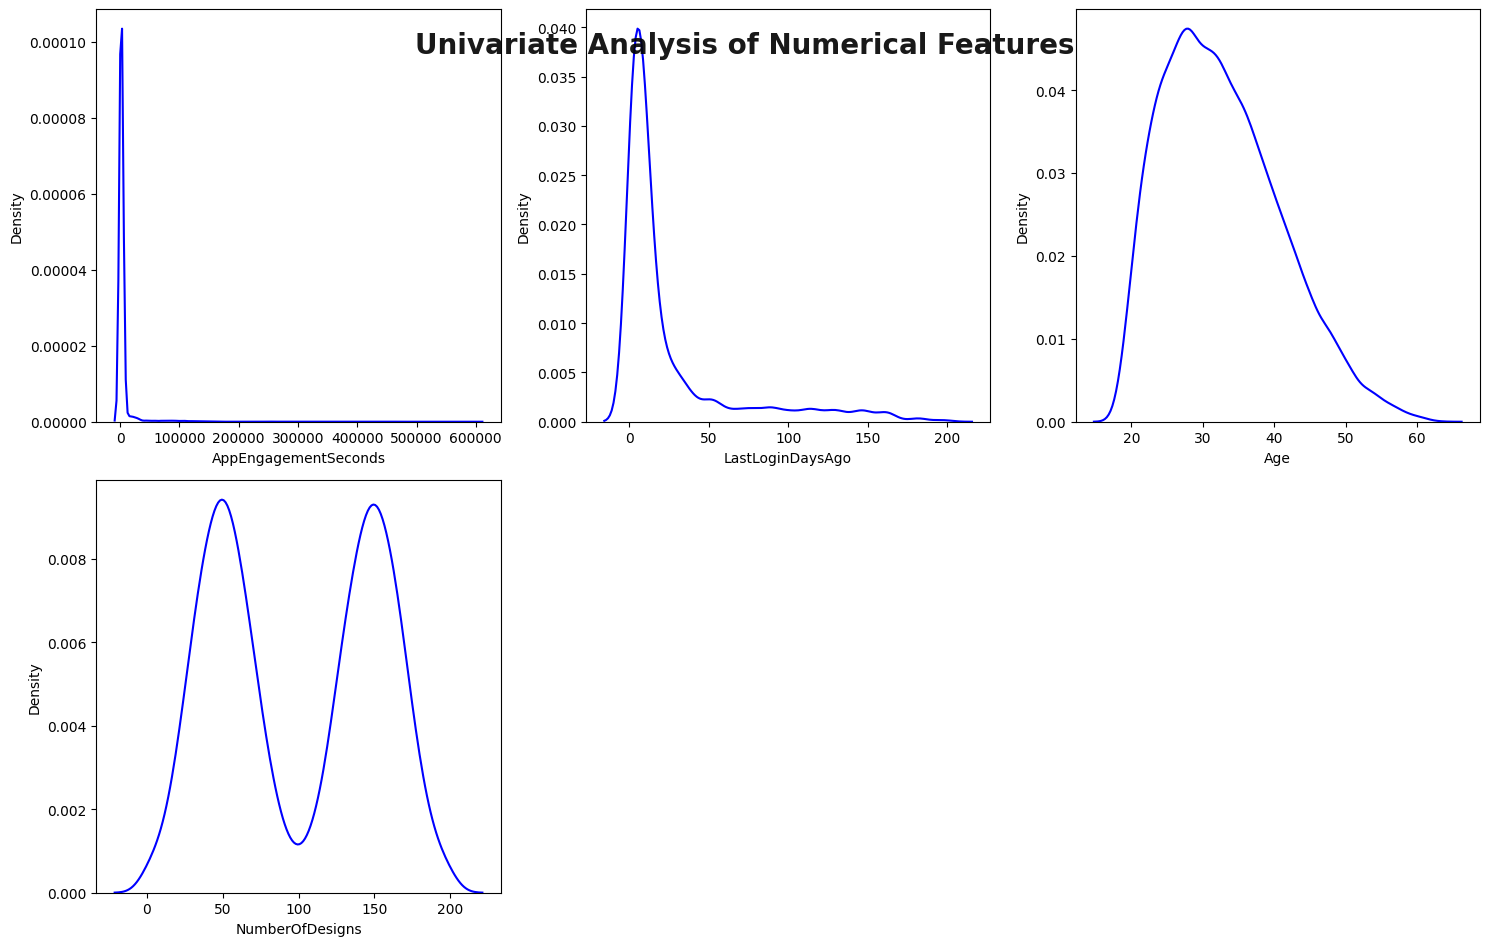

In [10]:
ncols = 3
nrows = (len(numeric_features) + ncols - 1) // ncols

plt.figure(figsize=(15, 5 * nrows))  
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.9, y=0.92)

for i, feature in enumerate(numeric_features):
    plt.subplot(nrows, ncols, i + 1)
    sns.kdeplot(x=df[feature], color="blue")
    plt.xlabel(feature)
    plt.tight_layout()

**Insights**

**AppEngagementSeconds:** The data shows a right-skewed distribution, indicating that while most users engage with the app for shorter periods, a few users have significantly high engagement times.

**LastLoginDaysAgo:** This feature is also right-skewed, suggesting that many users logged into the app relatively recently, though there's a long tail of users who haven't logged in for a while.

**Age:** The age distribution of users is roughly normal but with a slight skew, hinting at a concentration of users in a specific age range, possibly indicating the app's popularity among certain age groups.

**NumberOfDesigns:** It does appear to show characteristics of a bimodal distribution, with two distinct peaks suggesting two groups of users.

* Categorical Features

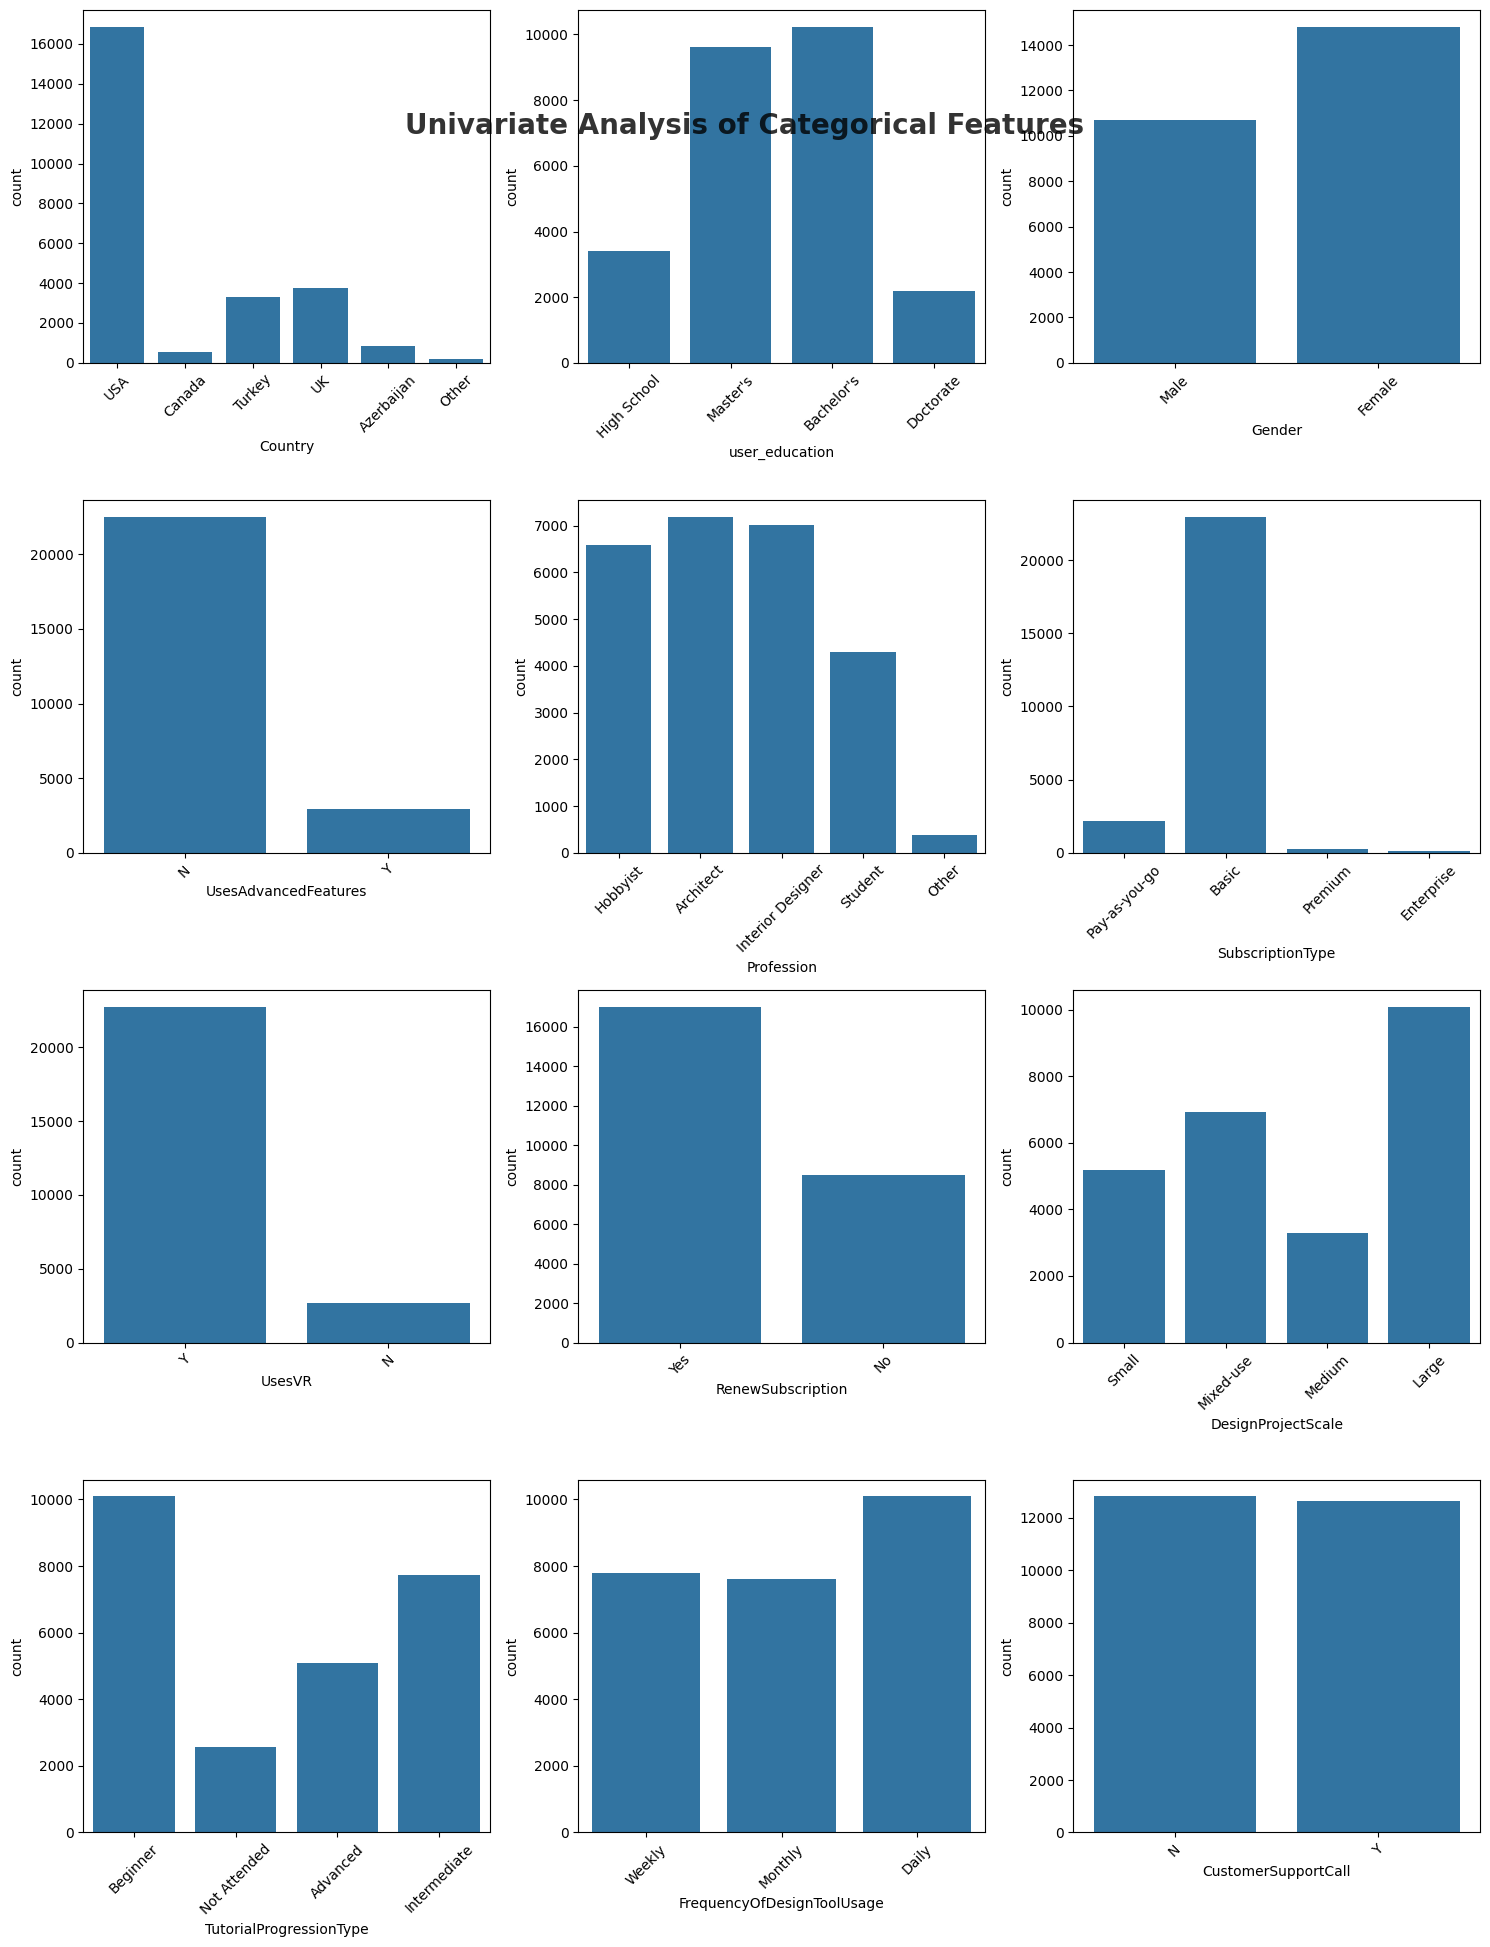

In [11]:
# Categorical columns
categorical_features.remove("CustomerID")
plt.figure(figsize=(15, 20)) 
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8, y=0.92)


for i in range(0, len(categorical_features)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45) 
    plt.tight_layout()

**Insights**

**Country:** The majority of users are from the USA, indicating a strong market presence in this region. This suggests that marketing and localization efforts should primarily focus on American users, while considering expansion strategies into other regions represented in the data.

**Profession:** The primary professions among users include 'Architects', 'Hobbyists', and 'Interior Designers'. This diversity indicates the platform's wide usability, appealing to both professionals in structured roles and individuals pursuing design as a hobby.

**UsesAdvancedFeatures:** A significant portion of the user base does not utilize advanced features. This could indicate either a lack of awareness about these features or a need for simpler, more accessible tools. Enhancing feature awareness and training could drive greater adoption.

**SubscriptionType:** The 'Basic' subscription type is most prevalent, followed by 'Pay-as-you-go' and 'Premium' plans. This suggests that while most users are looking for cost-effectiveness, there is a segment willing to invest more in premium features.

### Multivariate Analysis

In [12]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 4 continuous_features : ['AppEngagementSeconds', 'LastLoginDaysAgo', 'Age', 'NumberOfDesigns']


#### Check Multicollinearity for Categorical features

* A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

* A chi-square statistic is one way to show a relationship between two categorical variables.

* Here we test correlation of Categorical columns with Target column i.e case_status

**Hypothesis Statements:**

**Null Hypothesis (H0):** 
The feature is independent of the target column (no correlation).

**Alternative Hypothesis (H1):** 
The feature and target column are not independent (correlated).

In [13]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df["RenewSubscription"], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ["Column", "Hypothesis Result"]
result

,Column,Hypothesis Result
0,Country,Reject Null Hypothesis
1,user_education,Reject Null Hypothesis
2,Gender,Reject Null Hypothesis
3,UsesAdvancedFeatures,Fail to Reject Null Hypothesis
4,Profession,Reject Null Hypothesis
5,SubscriptionType,Reject Null Hypothesis
6,UsesVR,Reject Null Hypothesis
7,RenewSubscription,Reject Null Hypothesis
8,DesignProjectScale,Reject Null Hypothesis
9,TutorialProgressionType,Reject Null Hypothesis


**Report**

Fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

* UsesAdvancedFeatures

**Checking Null Values**

In [14]:
df.isnull().sum()

CustomerID                    0
Country                       0
user_education                0
Gender                        0
UsesAdvancedFeatures          0
AppEngagementSeconds          0
LastLoginDaysAgo              0
Profession                    0
SubscriptionType              0
UsesVR                        0
RenewSubscription             0
Age                           0
DesignProjectScale            0
NumberOfDesigns               0
TutorialProgressionType       0
FrequencyOfDesignToolUsage    0
CustomerSupportCall           0
dtype: int64

Our dataset has no missing values in any of the columns. 

In [15]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print("Num of continues features :",continues_features)

Num of continues features : ['AppEngagementSeconds', 'LastLoginDaysAgo', 'Age', 'NumberOfDesigns']


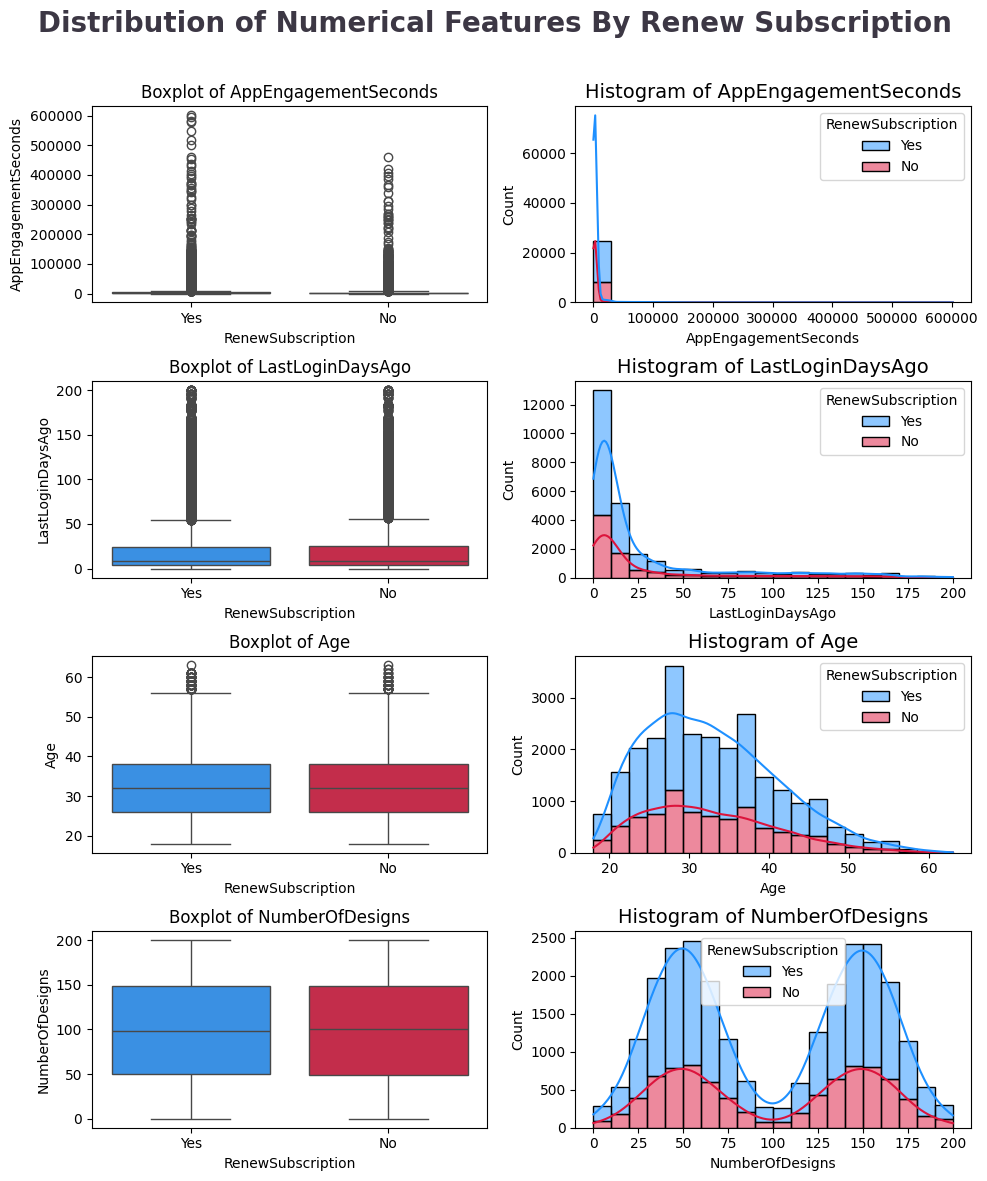

In [16]:
clr1 = ["#1E90FF", "#DC143C"]
fig, ax = plt.subplots(4, 2, figsize=(10,12))
fig.suptitle("Distribution of Numerical Features By Renew Subscription", color='#3C3744',
             fontsize=20, fontweight="bold", ha="center")
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x="RenewSubscription", y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue="RenewSubscription", bins=20, kde=True, 
                 multiple="stack", palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

##### General Observations

**Engagement Metrics (AppEngagementSeconds):** 

Users with higher total engagement times are more likely to renew their subscription, as indicated by the higher values in the boxplot and denser regions in the histogram for renewing users.

**Activity (NumberOfDesigns):**

The number of designs does not significantly differentiate between renewing and non-renewing users. The activity level, as measured by design counts, is similar across both groups.

**Demographics (Age):**

The impact of age on renewal decisions is relatively muted, with both renewing and non-renewing groups showing similar age distributions. This implies that age alone might not be a decisive factor in renewal but could be influential when combined with other factors for nuanced marketing strategies.

### 4) Visualization

##### 4.1 Visualize the Target Feature

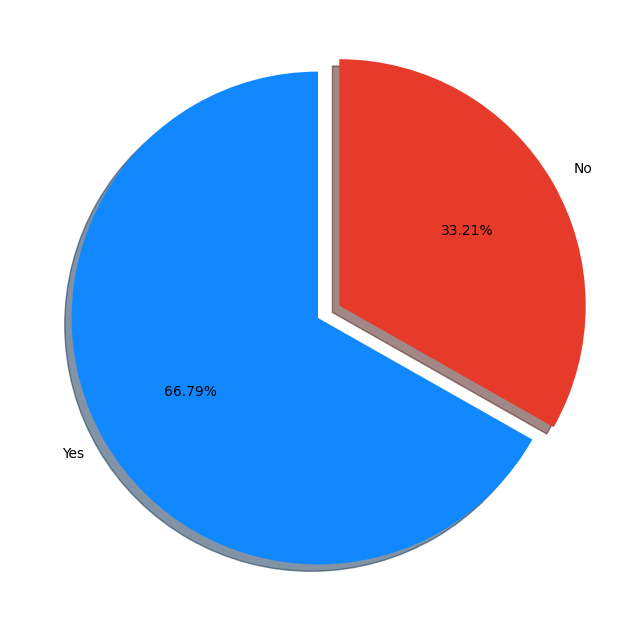

In [17]:
percentage = df.RenewSubscription.value_counts(normalize=True)*100
labels = ["Yes","No"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ["#1188ff","#e63a2a"]
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

The pie chart visualizes the proportion of users who have renewed their subscriptions versus those who have not, providing a clear and immediate representation of customer retention and attrition within dataset.

* From the chart it is seen that the Target Variable is Imbalanced

##### 4.2 Does the country in which the user is located affect the subscription status?

In [18]:
# Group data by country and their count of RenewSubscription
df.groupby("Country")["RenewSubscription"].value_counts(normalize=True).to_frame()*100

proportion
Country    RenewSubscription            
Azerbaijan Yes                 59.272300
           No                  40.727700
Canada     Yes                 71.506352
           No                  28.493648
Other      Yes                 64.583333
           No                  35.416667
Turkey     Yes                 62.879708
           No                  37.120292
UK         Yes                 76.339764
           No                  23.660236
USA        Yes                 65.690054
           No                  34.309946

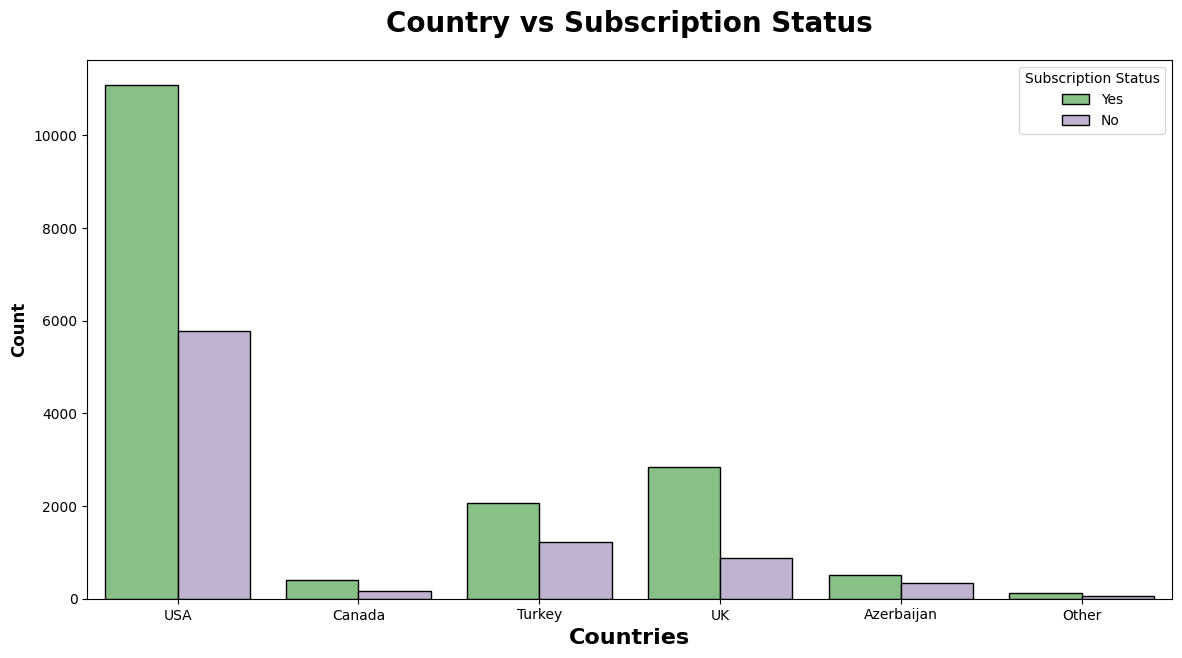

In [19]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Country",hue="RenewSubscription", data=df, ec = "black",palette="Accent")
plt.title("Country vs Subscription Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Countries", weight="bold", fontsize=16)
plt.legend(title="Subscription Status", fancybox=True)
plt.show()

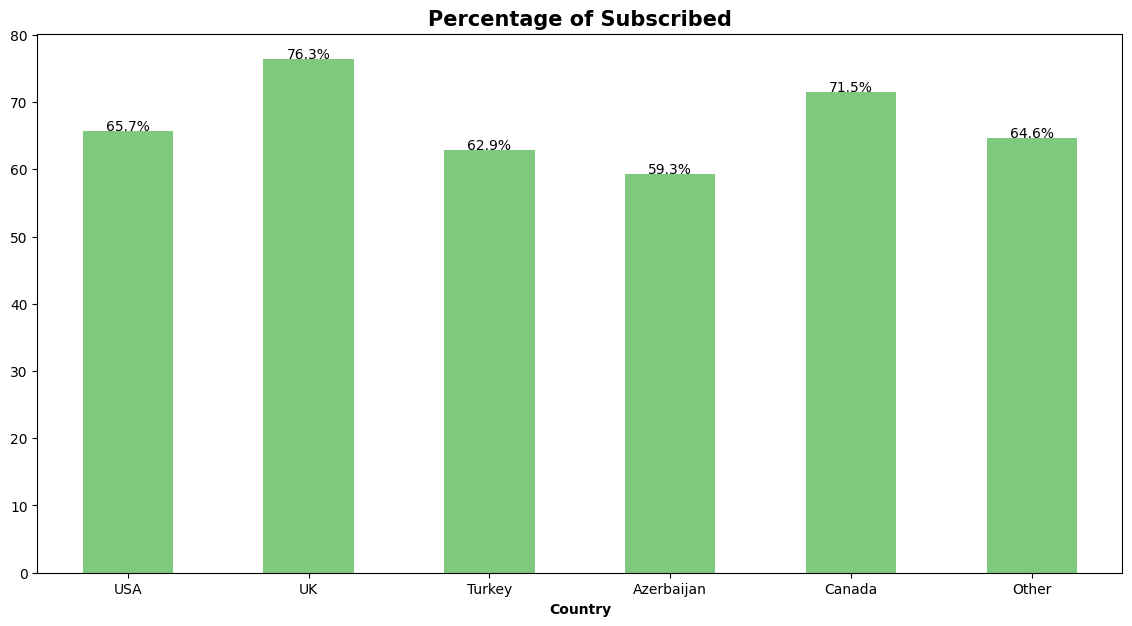

In [20]:
# Let's copy of the data
df2 = df.copy()

plt.figure(figsize=[14,7])

(100*df2[df2["RenewSubscription"].isin(["Yes"])]["Country"].value_counts()/df2["Country"].value_counts()).plot(
    kind="bar",stacked=True , colormap="Accent")
plt.title("Percentage of Subscribed" , fontsize = 15, fontweight ="bold")
order1 = (100*df2[df2["RenewSubscription"].isin(["Yes"])]["Country"].value_counts()/df2["Country"].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel("Country" , fontweight ="bold")
plt.xticks(rotation=0)
plt.show()

**Insights**

**UK:** Shows the highest renewal rate at approximately 76.3%, indicating strong customer retention and possibly successful regional strategies or high user satisfaction.

**Canada:** Also demonstrates a robust renewal rate of around 71.5%, suggesting effective engagement and user satisfaction in this region.

**USA and Other:** Moderate renewal rates of about 65.7% and 64.6%, respectively, could imply room for improved engagement or customer support.

**Turkey:** Has a slightly lower renewal rate of about 62.9%, which might suggest challenges in user engagement or market-specific issues.

**Azerbaijan:** Has the lowest renewal rate among the listed countries at approximately 59.3%, indicating potential areas for significant improvement in user retention strategies.

##### 4.3 Does user education has any impact on Subscription status?

In [21]:
# Group data by Education and their count of RenewSubscription
df.groupby("user_education")["RenewSubscription"].value_counts(normalize=True).to_frame()*100

proportion
user_education RenewSubscription            
Bachelor's     Yes                 62.448700
               No                  37.551300
Doctorate      Yes                 84.990876
               No                  15.009124
High School    No                  60.116959
               Yes                 39.883041
Master's       Yes                 76.811293
               No                  23.188707

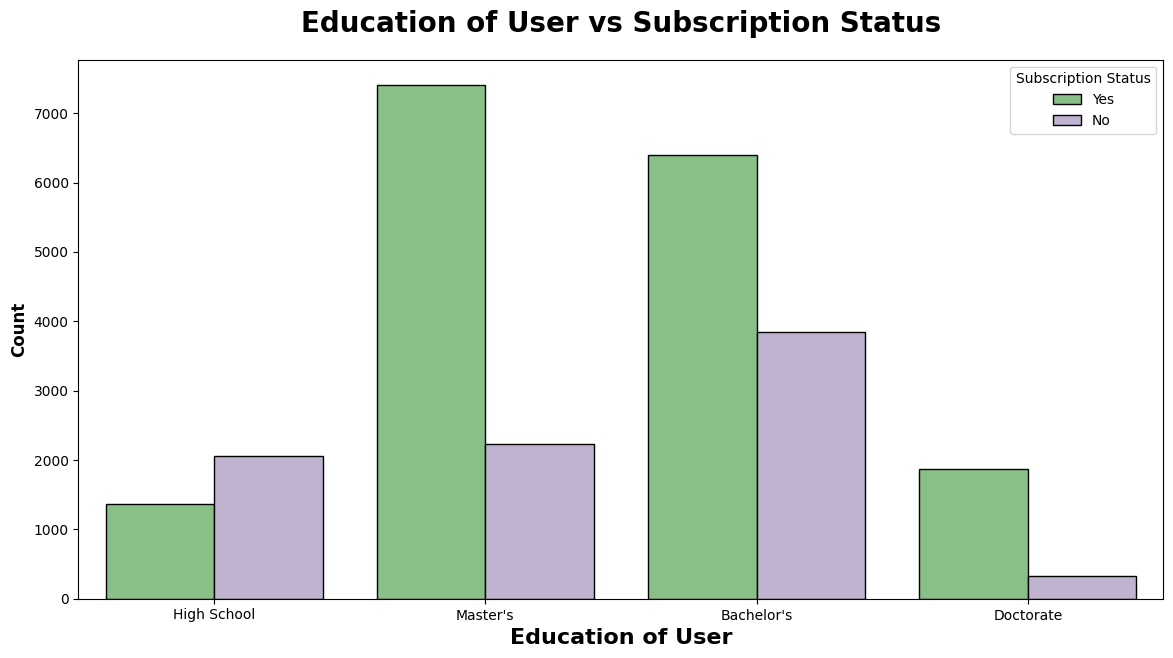

In [22]:
plt.subplots(figsize=(14,7))
sns.countplot(x="user_education",hue="RenewSubscription", data=df, ec = "black",palette="Accent")
plt.title("Education of User vs Subscription Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of User", weight="bold", fontsize=16)
plt.legend(title="Subscription Status", fancybox=True)
plt.show()

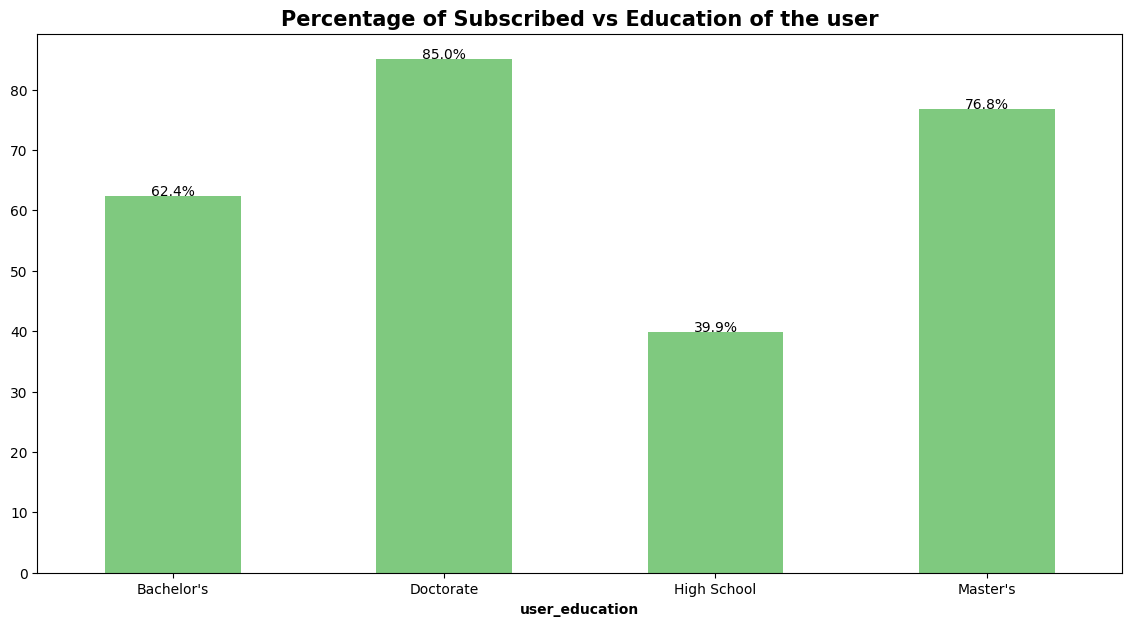

In [23]:
plt.figure(figsize=[14,7])

(100*df2[df2["RenewSubscription"].isin(["Yes"])]["user_education"].value_counts()/df2["user_education"].value_counts()).plot(
    kind="bar",stacked=True , colormap="Accent")
plt.title("Percentage of Subscribed vs Education of the user" , fontsize = 15, fontweight ="bold")
order1 = (100*df2[df2["RenewSubscription"].isin(["Yes"])]["user_education"].value_counts()/df2["user_education"].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel("user_education" , fontweight ="bold")
plt.xticks(rotation=0)
plt.show()

**Insights**

**Doctorate:** Users with a Doctorate show the highest renewal rate at approximately 85%, indicating a very strong loyalty or satisfaction with the service among highly educated users.

**Master's:** Also demonstrates a high renewal rate of about 76.8%, suggesting that users with advanced degrees find significant value in the service.

**Bachelor's:** Users with a Bachelor’s degree have a moderate renewal rate of 62.4%, which is notably lower than those with higher degrees but still indicates a positive engagement.

**High School:** This group shows the lowest renewal rate at around 39.9%, indicating significant challenges in retaining users with this level of education.

##### 4.4 Does SubscriptionType has any impact on Subscription status?

In [24]:
# Group data by Subscription Type and their count of RenewSubscription
df.groupby("SubscriptionType")["RenewSubscription"].value_counts(normalize=True).to_frame()*100

proportion
SubscriptionType RenewSubscription            
Basic            Yes                 69.366780
                 No                  30.633220
Enterprise       Yes                 56.179775
                 No                  43.820225
Pay-as-you-go    No                  59.851646
                 Yes                 40.148354
Premium          Yes                 63.970588
                 No                  36.029412

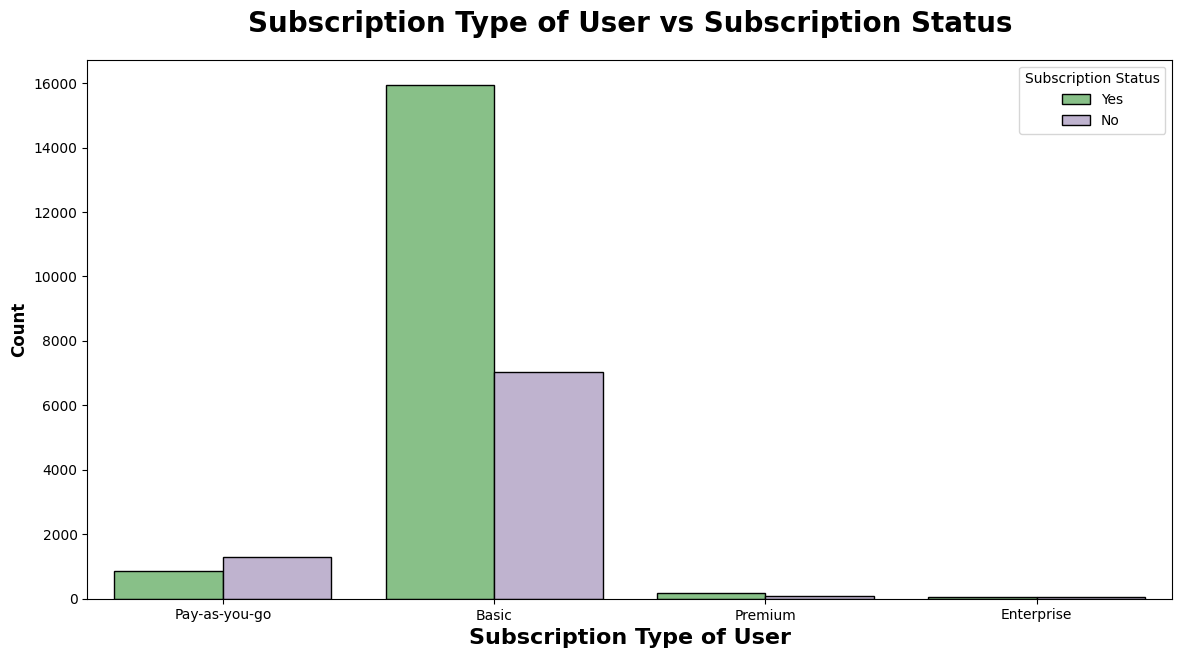

In [25]:
plt.subplots(figsize=(14,7))
sns.countplot(x="SubscriptionType",hue="RenewSubscription", data=df, ec = "black",palette="Accent")
plt.title("Subscription Type of User vs Subscription Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Subscription Type of User", weight="bold", fontsize=16)
plt.legend(title="Subscription Status", fancybox=True)
plt.show()

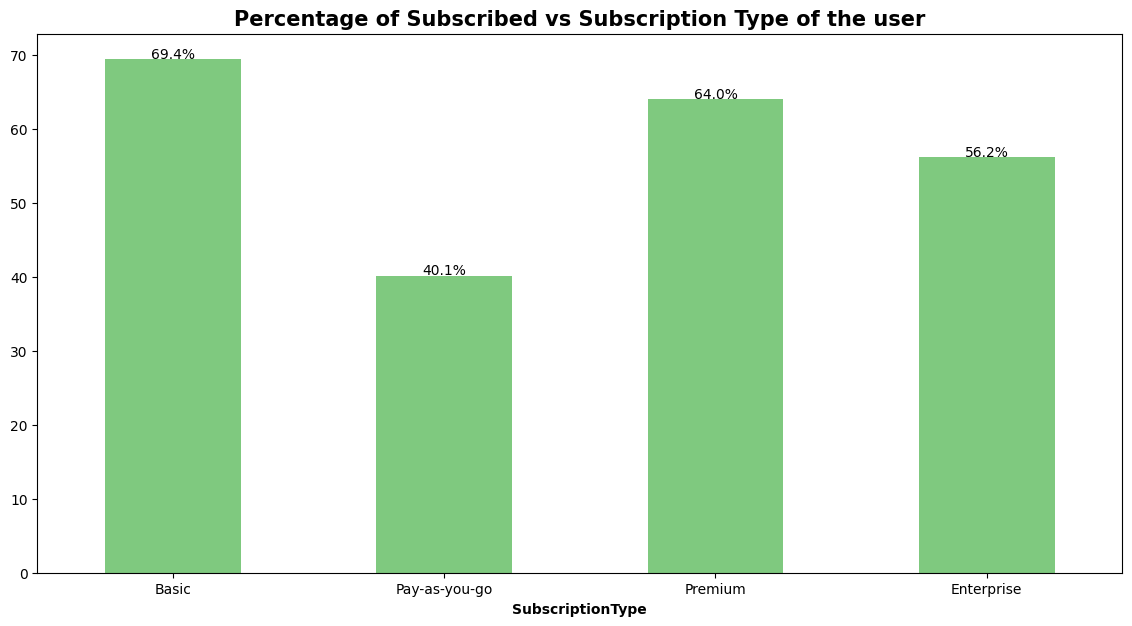

In [26]:
plt.figure(figsize=[14,7])

(100*df2[df2["RenewSubscription"].isin(["Yes"])]["SubscriptionType"].value_counts()/df2["SubscriptionType"].value_counts()).plot(
    kind="bar",stacked=True , colormap="Accent")
plt.title("Percentage of Subscribed vs Subscription Type of the user" , fontsize = 15, fontweight ="bold")
order1 = (100*df2[df2["RenewSubscription"].isin(["Yes"])]["SubscriptionType"].value_counts()/df2["SubscriptionType"].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel("SubscriptionType" , fontweight ="bold")
plt.xticks(rotation=0)
plt.show()

**Insights**

**Basic:** This subscription type shows a relatively high renewal rate of approximately 69.4%, suggesting that it is well-balanced in terms of cost and value, making it attractive for continued renewal.

**Premium:** Renewal rates for Premium subscribers are about 64%, indicating a moderate level of satisfaction or value perception among these users.

**Enterprise:** Users on the Enterprise plan have a renewal rate of approximately 56.2%, which is  lower than Premium. This might indicate that expectations associated with higher-cost services are not fully met or that the value proposition needs enhancement.

**Pay-as-you-go:** This plan has the lowest renewal rate at about 40.1%, suggesting significant challenges in retaining users on this flexible but possibly less committed plan.

##### 4.5 Does Professions has any impact on Subscription status?

In [27]:
# Group data by Profession and their count of RenewSubscription
df.groupby("Profession")["RenewSubscription"].value_counts(normalize=True).to_frame()*100

proportion
Profession        RenewSubscription            
Architect         Yes                 66.031967
                  No                  33.968033
Hobbyist          Yes                 65.153356
                  No                  34.846644
Interior Designer Yes                 66.281887
                  No                  33.718113
Other             Yes                 61.866667
                  No                  38.133333
Student           Yes                 71.813327
                  No                  28.186673

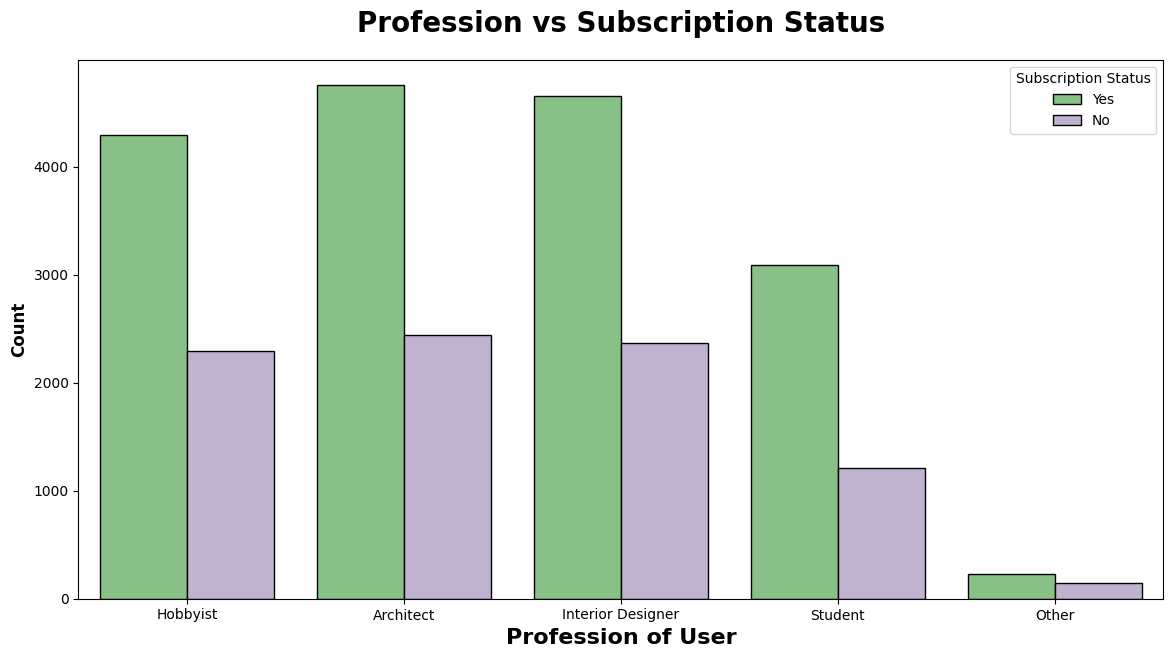

In [28]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Profession",hue="RenewSubscription", data=df, ec = "black",palette="Accent")
plt.title("Profession vs Subscription Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Profession of User", weight="bold", fontsize=16)
plt.legend(title="Subscription Status", fancybox=True)
plt.show()

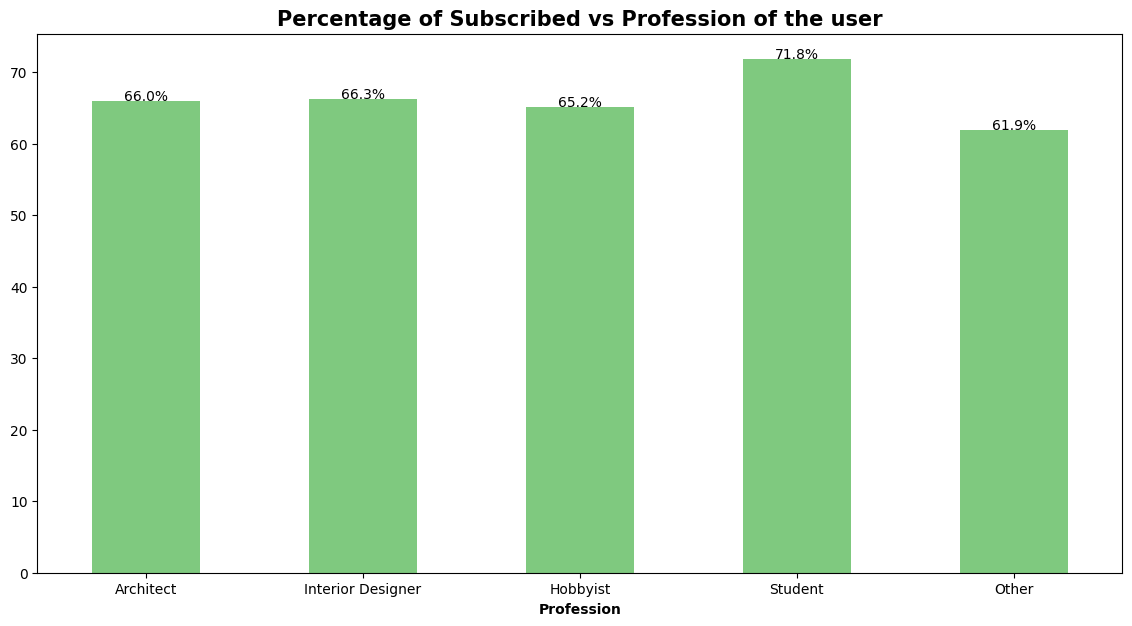

In [29]:
plt.figure(figsize=[14,7])

(100*df2[df2["RenewSubscription"].isin(["Yes"])]["Profession"].value_counts()/df2["Profession"].value_counts()).plot(
    kind="bar",stacked=True , colormap="Accent")
plt.title("Percentage of Subscribed vs Profession of the user" , fontsize = 15, fontweight ="bold")
order1 = (100*df2[df2["RenewSubscription"].isin(["Yes"])]["Profession"].value_counts()/df2["Profession"].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel("Profession" , fontweight ="bold")
plt.xticks(rotation=0)
plt.show()

**Insights**

**Student:** Exhibits the highest renewal rate at approximately 71.8%, indicating high engagement or satisfaction among students. This group's standout performance could be attributed to student-specific features, pricing advantages, or the educational value they receive from the platform, making it particularly beneficial and attractive for this demographic.

**Other Professions (Interior Designer, Architect, Hobbyist, etc.):** Most other professions show relatively similar renewal rates, generally around 60% to 66%, suggesting a fairly uniform level of satisfaction across these groups. This homogeneity indicates that while the platform broadly meets professional needs, there may be opportunities to tailor features or marketing strategies to address specific requirements or pain points within each profession to enhance satisfaction and renewal rates further.

##### 4.6 Does FrequencyOfDesignToolUsage has any impact on Subscription status?

In [30]:
# Group data by FrequencyOfDesignToolUsage and their count of RenewSubscription
df.groupby("FrequencyOfDesignToolUsage")["RenewSubscription"].value_counts(normalize=True).to_frame()*100

proportion
FrequencyOfDesignToolUsage RenewSubscription            
Daily                      Yes                 75.198177
                           No                  24.801823
Monthly                    Yes                 54.302983
                           No                  45.697017
Weekly                     Yes                 68.098238
                           No                  31.901762

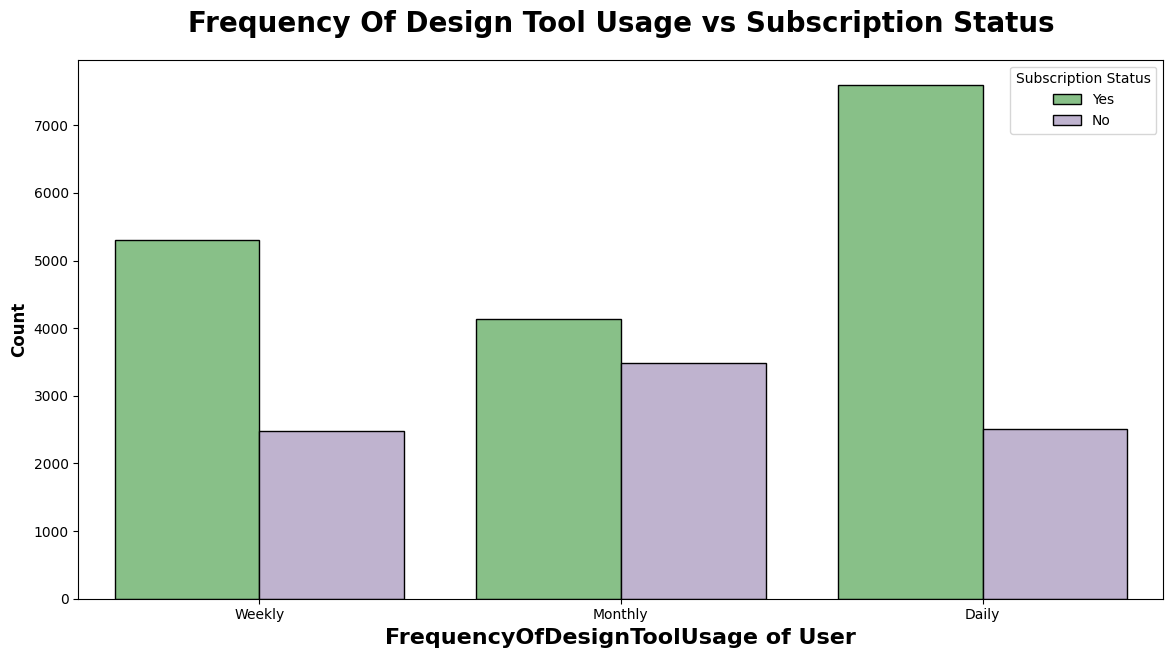

In [31]:
plt.subplots(figsize=(14,7))
sns.countplot(x="FrequencyOfDesignToolUsage",hue="RenewSubscription", data=df, ec = "black",palette="Accent")
plt.title("Frequency Of Design Tool Usage vs Subscription Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("FrequencyOfDesignToolUsage of User", weight="bold", fontsize=16)
plt.legend(title="Subscription Status", fancybox=True)
plt.show()

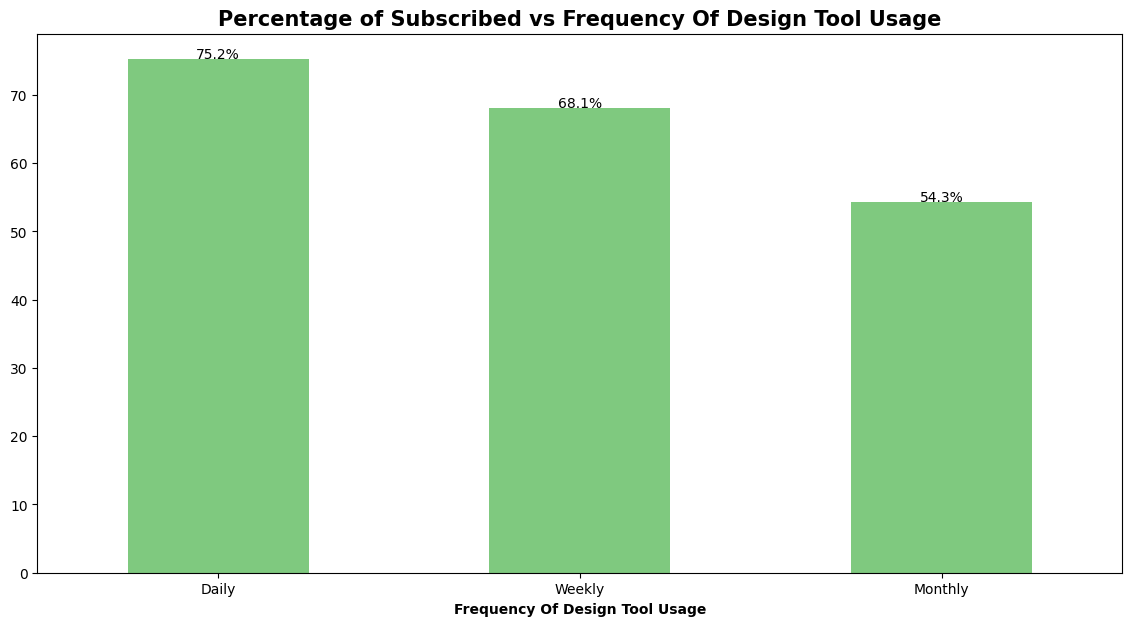

In [32]:
plt.figure(figsize=[14,7])

(100*df2[df2["RenewSubscription"].isin(["Yes"])]["FrequencyOfDesignToolUsage"].value_counts()/df2["FrequencyOfDesignToolUsage"].value_counts()).plot(
    kind="bar",stacked=True , colormap="Accent")
plt.title("Percentage of Subscribed vs Frequency Of Design Tool Usage" , fontsize = 15, fontweight ="bold")
order1 = (100*df2[df2["RenewSubscription"].isin(["Yes"])]["FrequencyOfDesignToolUsage"].value_counts()/df2["FrequencyOfDesignToolUsage"].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel("Frequency Of Design Tool Usage" , fontweight ="bold")
plt.xticks(rotation=0)
plt.show()

**Insights**

**Daily Users:** Those who use the design tools daily show the highest renewal rate at approximately 75.2%. This high rate underscores the strong link between frequent engagement and subscription loyalty.

**Weekly Users:** Users who engage with the design tools on a weekly basis have a substantial renewal rate of about 68.1%, indicating that regular but less frequent use still supports a strong likelihood of renewal.

**Monthly Users:** This group shows the lowest renewal rate, at about 54.3%, suggesting that infrequent usage correlates with a higher likelihood of subscription lapse or dissatisfaction.

##### 4.7 Does CustomerSupportCall has any impact on Subscription status?

In [33]:
# Group data by Customer Support Call and their count of RenewSubscription
df.groupby("CustomerSupportCall")["RenewSubscription"].value_counts(normalize=True).to_frame()*100

proportion
CustomerSupportCall RenewSubscription            
N                   Yes                 61.007565
                    No                  38.992435
Y                   Yes                 72.647547
                    No                  27.352453

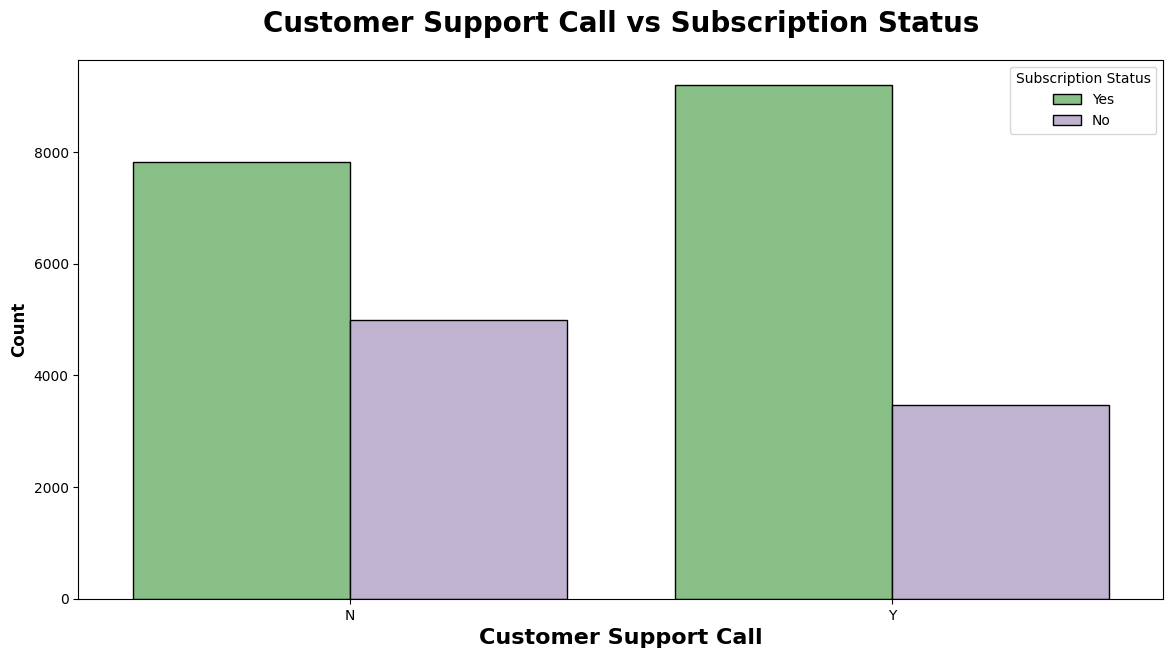

In [34]:
plt.subplots(figsize=(14,7))
sns.countplot(x="CustomerSupportCall",hue="RenewSubscription", data=df, ec = "black",palette="Accent")
plt.title("Customer Support Call vs Subscription Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Customer Support Call", weight="bold", fontsize=16)
plt.legend(title="Subscription Status", fancybox=True)
plt.show()

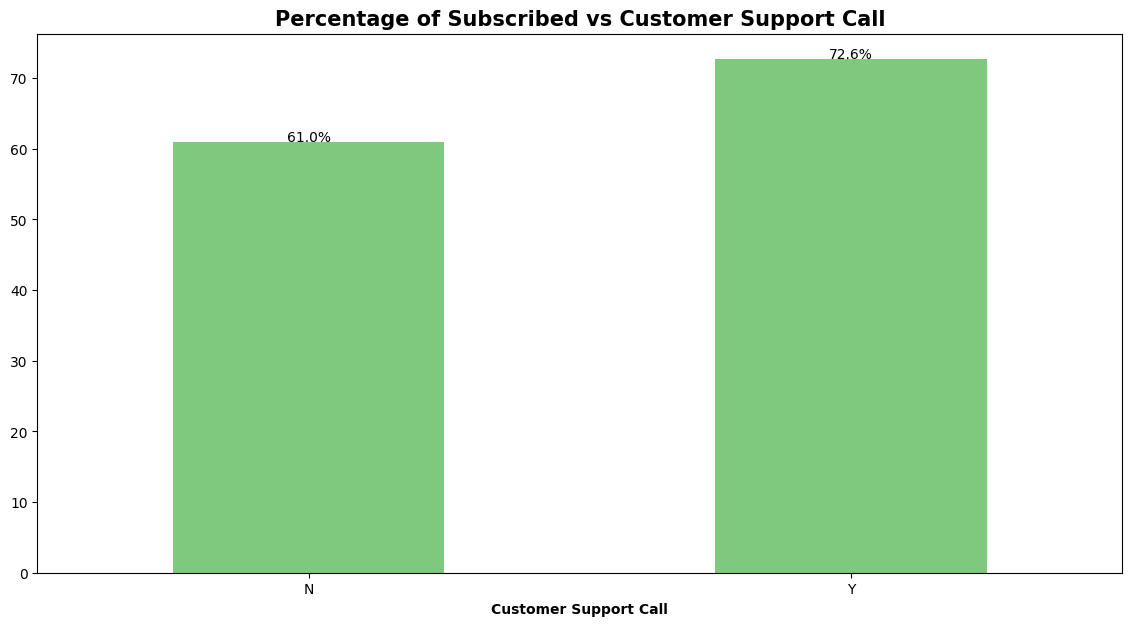

In [35]:
plt.figure(figsize=[14,7])

(100*df2[df2["RenewSubscription"].isin(["Yes"])]["CustomerSupportCall"].value_counts()/df2["CustomerSupportCall"].value_counts()).plot(
    kind="bar",stacked=True , colormap="Accent")
plt.title("Percentage of Subscribed vs Customer Support Call" , fontsize = 15, fontweight ="bold")
order1 = (100*df2[df2["RenewSubscription"].isin(["Yes"])]["CustomerSupportCall"].value_counts()/df2["CustomerSupportCall"].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel("Customer Support Call" , fontweight ="bold")
plt.xticks(rotation=0)
plt.show()

**Insights**

**Users Who Called Support (Y):** This group exhibits a higher renewal rate of approximately 72.6%. This suggests that users who engage with customer support are more likely to find resolutions to their issues or feel valued, which enhances their likelihood of renewing.

**Users Who Did Not Call Support (N):** These users have a lower renewal rate, at about 61%. The lower rate may indicate that users not calling for support either experience fewer issues or may not be as engaged or aware of how to seek help when needed.

##### 4.8 Does Gender has any impact on Subscription status?

In [36]:
# Group data by Gender and their count of RenewSubscription
df.groupby("Gender")["RenewSubscription"].value_counts(normalize=True).to_frame()*100

proportion
Gender RenewSubscription            
Female Yes                 70.254020
       No                  29.745980
Male   Yes                 61.987264
       No                  38.012736

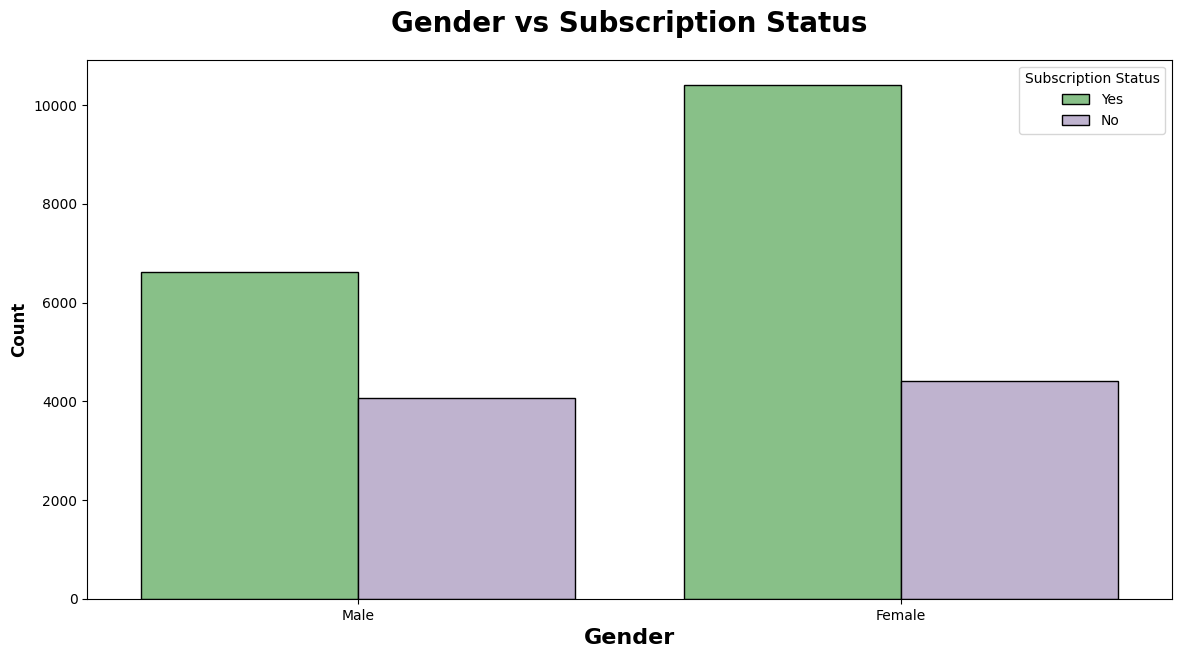

In [37]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Gender",hue="RenewSubscription", data=df, ec = "black",palette="Accent")
plt.title("Gender vs Subscription Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.legend(title="Subscription Status", fancybox=True)
plt.show()

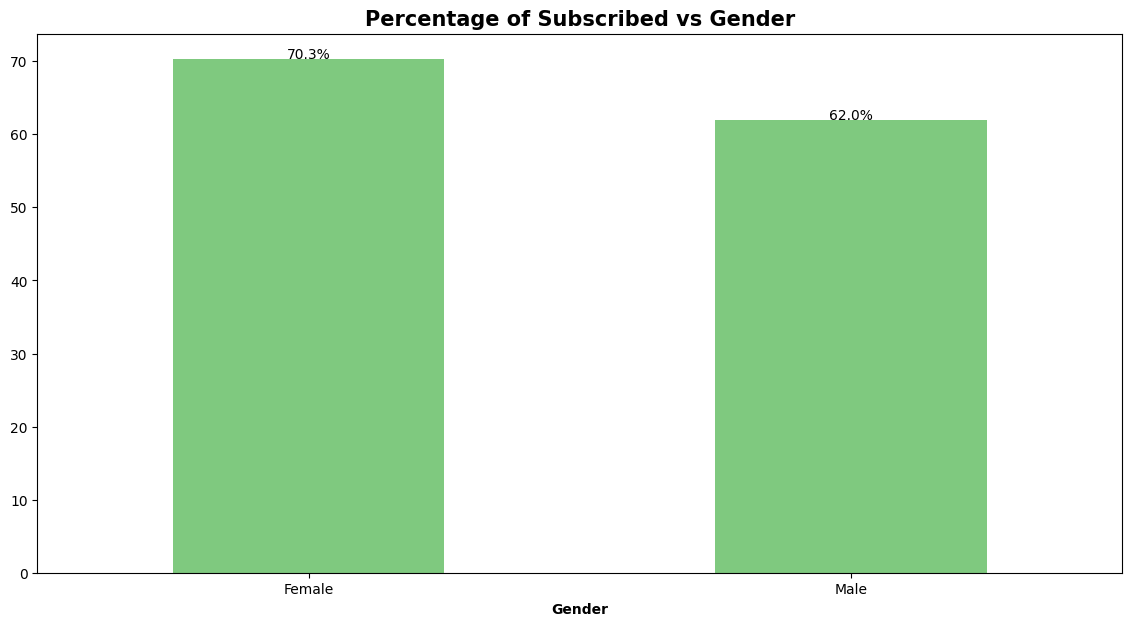

In [38]:
plt.figure(figsize=[14,7])

(100*df2[df2["RenewSubscription"].isin(["Yes"])]["Gender"].value_counts()/df2["Gender"].value_counts()).plot(
    kind="bar",stacked=True , colormap="Accent")
plt.title("Percentage of Subscribed vs Gender" , fontsize = 15, fontweight ="bold")
order1 = (100*df2[df2["RenewSubscription"].isin(["Yes"])]["Gender"].value_counts()/df2["Gender"].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel("Gender" , fontweight ="bold")
plt.xticks(rotation=0)
plt.show()

* These results indicate a difference in renewal rates between genders, with female users showing a substantially higher likelihood of renewing their subscriptions compared to male users. This suggests that gender may have an impact on subscription status, with females appearing more likely to maintain their subscriptions.

##### 4.9 Does AppEngagementSeconds has any impact on Subscription status?

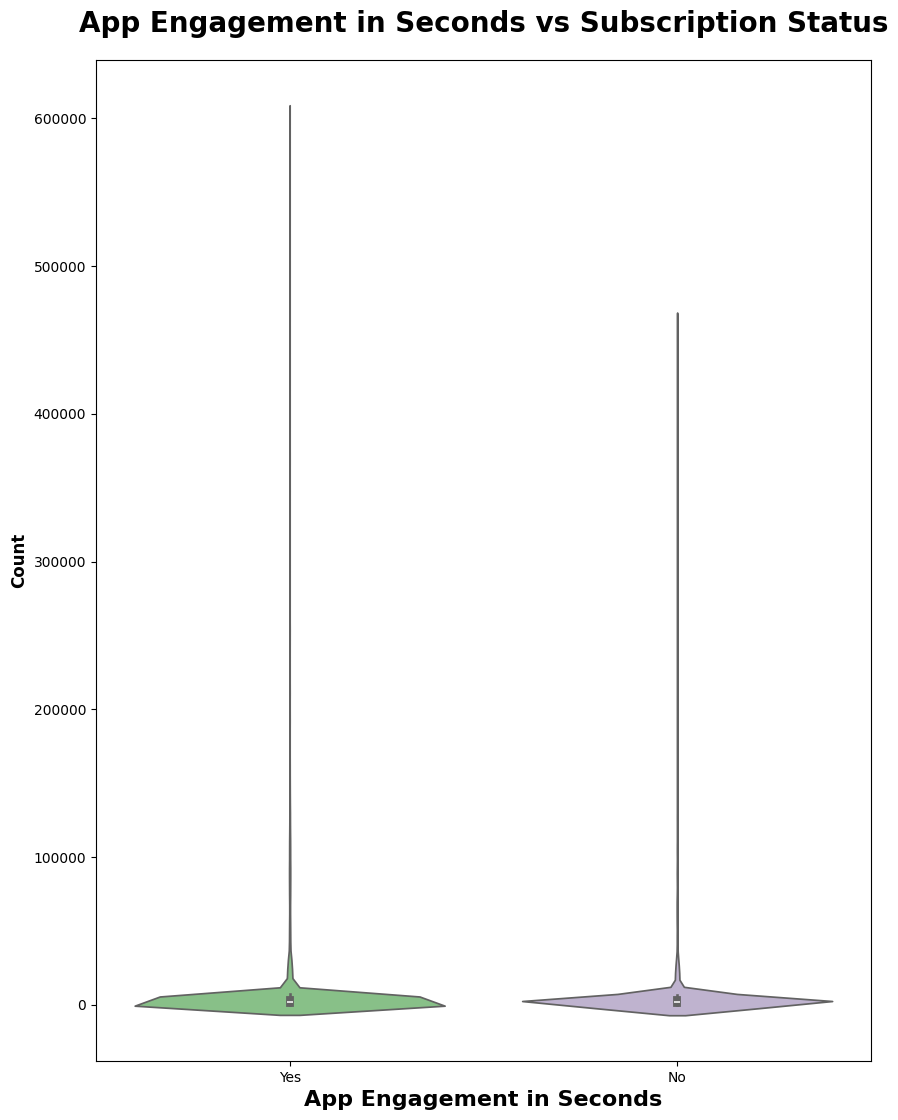

In [39]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="RenewSubscription",y="AppEngagementSeconds", data=df, palette="Accent")
plt.title("App Engagement in Seconds vs Subscription Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("App Engagement in Seconds", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**Insights**

* The violin plot reveals a broader distribution of higher engagement times among users who renew their subscriptions, indicating that greater app engagement is associated with a higher likelihood of renewal.
Both renewing and non-renewing groups have users with a wide range of engagement times, but the presence of extreme values in the renewing group suggests that very high engagement strongly correlates with subscription renewal.

* But there are outliers in both the classes which need to be handeled.

##### 4.10 Does LastLoginDaysAgo has any impact on Subscription status?

In [40]:
df.groupby("LastLoginDaysAgo").RenewSubscription.value_counts().head(10)

LastLoginDaysAgo  RenewSubscription
0                 Yes                   521
                  No                    285
1                 Yes                  1237
                  No                    650
2                 Yes                  1004
                  No                    565
3                 Yes                   909
                  No                    466
4                 Yes                   880
                  No                    432
Name: count, dtype: int64

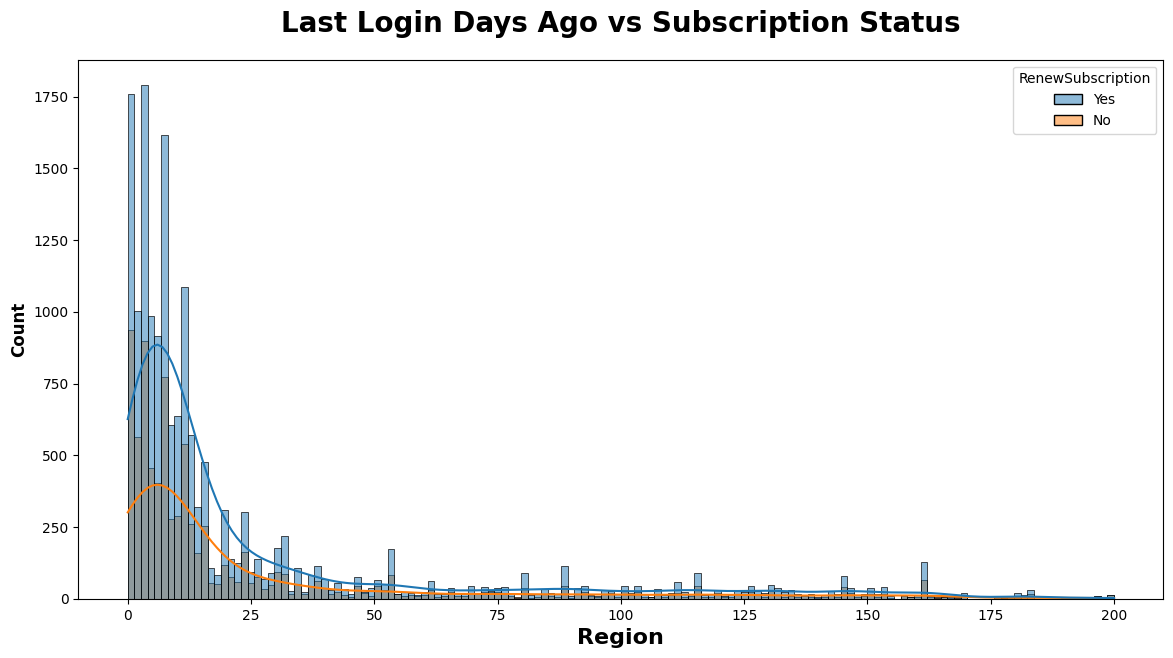

In [41]:
plt.subplots(figsize=(14,7))
sns.histplot(x="LastLoginDaysAgo",hue="RenewSubscription", data=df, kde=True)
plt.title("Last Login Days Ago vs Subscription Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

* There are outliers in both the classes which need to be handeled.

##### 4.11 LastLoginDaysAgo based on Education

In [42]:
print("Last Login Days Ago based on user education")
df.groupby("user_education")["LastLoginDaysAgo"].mean().to_frame().sort_values(by="LastLoginDaysAgo",ascending=False)

Last Login Days Ago based on user education


,LastLoginDaysAgo
user_education,
High School,26.493860
Doctorate,26.461679
Master's,25.776105
Bachelor's,25.235196


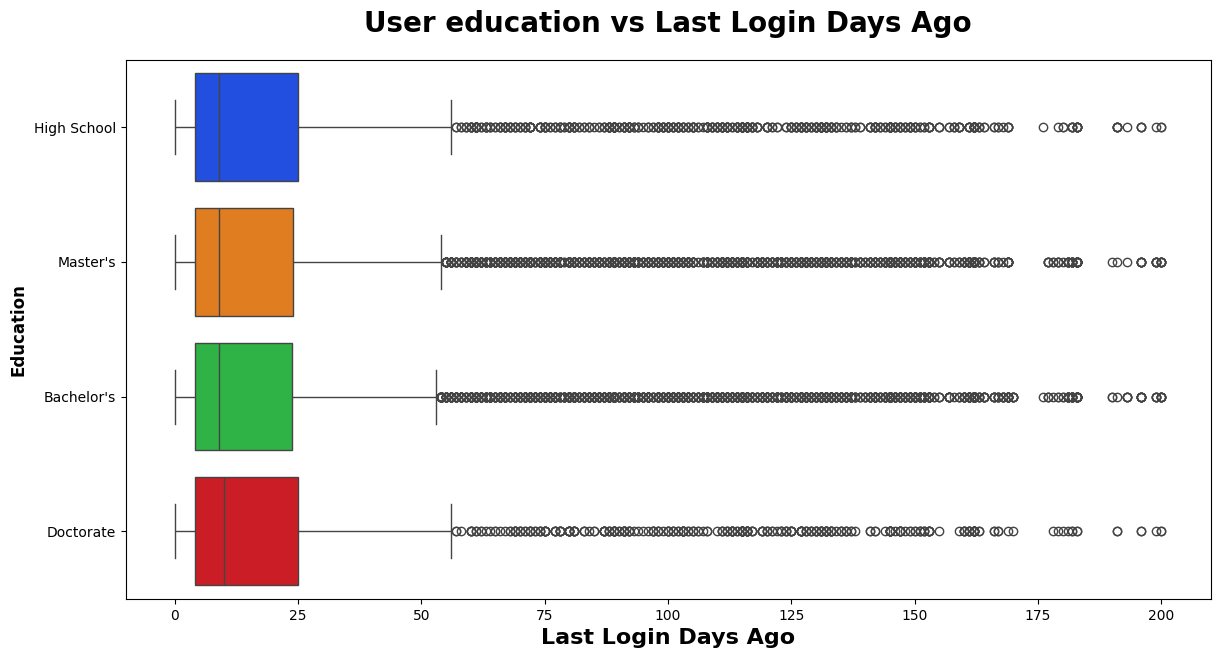

In [43]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="user_education",x = "LastLoginDaysAgo", data=df,palette='bright')
plt.title("User education vs Last Login Days Ago", weight="bold",fontsize=20, pad=20)
plt.xlabel("Last Login Days Ago", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

* The average number of days since the last login ranges narrowly between approximately 25.23 and 26.49 days across all educational groups (High School, Bachelor's, Master's, and Doctorate). This suggests that there's no significant variation in login frequency based on educational background.

##### 4.12 LastLoginDaysAgo based on SubscriptionType

In [44]:
print("Last Login Days Ago based on Subscription Type")
df.groupby("SubscriptionType")["LastLoginDaysAgo"].mean().to_frame().sort_values(by="LastLoginDaysAgo",ascending=False)

Last Login Days Ago based on Subscription Type


,LastLoginDaysAgo
SubscriptionType,
Premium,32.661765
Enterprise,31.382022
Pay-as-you-go,30.256375
Basic,25.183216


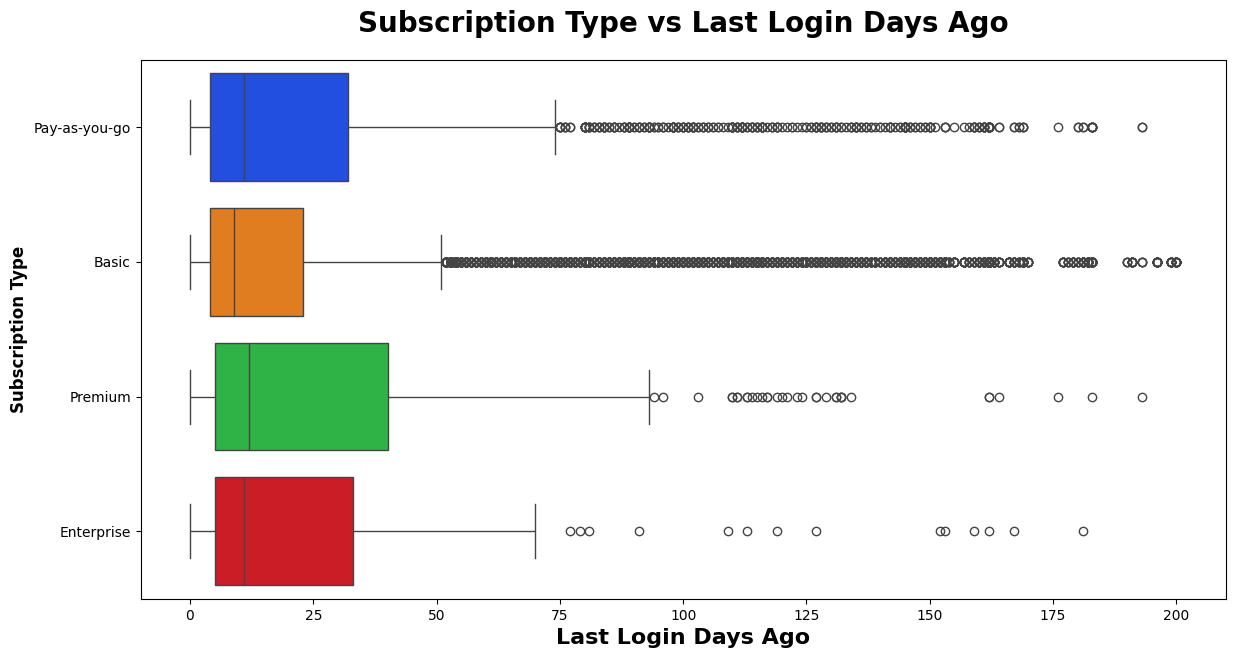

In [45]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="SubscriptionType",x = "LastLoginDaysAgo", data=df,palette='bright')
plt.title("Subscription Type vs Last Login Days Ago", weight="bold",fontsize=20, pad=20)
plt.xlabel("Last Login Days Ago", weight="bold", fontsize=16)
plt.ylabel("Subscription Type", weight="bold", fontsize=12)
plt.show()

**Insights**

* Subscribers on the Basic plan log in the most frequently, with an average of 25.18 days. This higher frequency of logins among Basic subscribers could reflect a higher level of engagement or dependence on the service's fundamental features, which are often more accessible and regularly needed.

### Final Report

* CustomerID column can be dropped as it is an ID.

* The UsesAdvancedFeatures column can be dropped as it doesn't have much effect on the target variable, as shown by the visualisation and the chi2 test.

* LastLoginDaysAgo, AppEngagementSeconds columns have outllier which should be handled.

* Target column RenewSubscription is imbalanced can be handled before model building.

In [46]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################